In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [5]:
##create the dataset
X,Y=make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=42)

In [7]:
X,Y

(array([[ 0.7715326 , -1.47433614,  2.19664605, ...,  0.68174341,
          1.08996189,  0.96250289],
        [ 1.85838284, -3.68087983,  0.22749588, ..., -0.47417818,
          1.34113888, -0.77177196],
        [-0.98724764,  1.53916836,  0.5859042 , ..., -0.32202815,
         -1.45103394,  1.32543211],
        ...,
        [-1.227082  ,  1.65602784,  0.47263035, ..., -0.8634936 ,
         -1.83932326, -0.03120349],
        [ 1.28527572, -0.29715202, -0.67172079, ..., -1.31544131,
          2.85446468,  1.3094441 ],
        [-0.75428048,  0.88516075, -1.6728939 , ..., -2.0362205 ,
         -1.43989584,  0.04749347]]),
 array([1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1,
        2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1,
        2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2,
        0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
        0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0,
   

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [11]:
#model training
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr')

In [14]:
logistic.fit(X_train,Y_train)
Y_pred=logistic.predict(X_test)

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(Y_test,Y_pred)
print("accuracy score:",score)
cm=confusion_matrix(Y_test,Y_pred)
print("confusion_matrix:",cm)
print(classification_report(Y_test,Y_pred))

accuracy score: 0.68
confusion_matrix: [[79 16  8]
 [31 38 27]
 [ 3 11 87]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       103
           1       0.58      0.40      0.47        96
           2       0.71      0.86      0.78       101

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.67      0.68      0.66       300



Logistic Regression for Imbalanced Dataset

In [16]:
#Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [20]:
#imbalanced datasets
X,Y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [21]:
X,Y

(array([[ 1.87991016, -1.4850347 ],
        [ 0.37708311, -2.23858488],
        [ 1.35431163, -2.66463822],
        ...,
        [ 0.99509904, -0.54192355],
        [ 1.75859359, -1.54961188],
        [ 0.79770543, -1.99467372]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [22]:
Counter(Y)

Counter({0: 9846, 1: 154})

In [23]:
import seaborn as sns

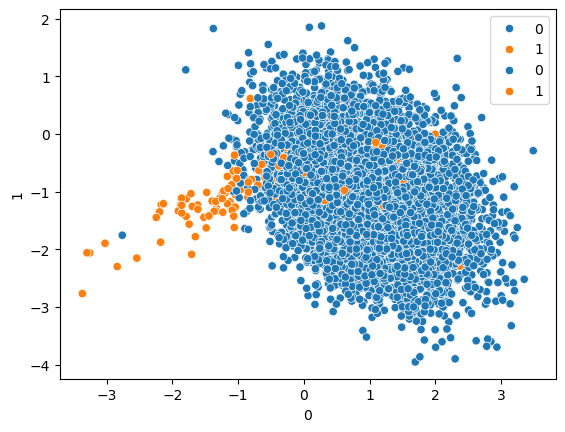

In [28]:
import pandas as pd
df=pd.DataFrame(X)
sns.scatterplot(x=df[0],y=df[1],hue=Y)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [30]:
#Hyper parameter tuning
#Hyperparameter tuning and cross validation
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]


In [31]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [32]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [34]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [35]:
grid.fit(X_train,Y_train)

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [36]:
grid.best_estimator_

LogisticRegression(C=0.01, class_weight={0: 10, 1: 50}, solver='newton-cg')

In [38]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [39]:
Y_pred=grid.predict(X_test)

In [40]:
#after appying best parameters
score=accuracy_score(Y_test,Y_pred)
print("accuracy score:",score)
cm=confusion_matrix(Y_test,Y_pred)
print("confusion_matrix:",cm)
print(classification_report(Y_test,Y_pred))

accuracy score: 0.9886666666666667
confusion_matrix: [[2949    4]
 [  30   17]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2953
           1       0.81      0.36      0.50        47

    accuracy                           0.99      3000
   macro avg       0.90      0.68      0.75      3000
weighted avg       0.99      0.99      0.99      3000

